# Amazon Business Reasearch Analyst  Use Case

### Life cycle of Machine learning Project

- Understanding the problem statement
- Data Collection
- Things to perform with dataset
- Performing Exploratory data analysis
- Data Preprocessing
- Model training
- Choosing the best model

### 1) Problem Statement
- This project understands how the time taken to deliver an order is affected by the other variables such as ID, delivery person id, delivery person age, delivery person rating, restaurant latitude, restaurant longitude, delivery location latitude, delivery location longitude, order date, order time, order picking time, weather conditions, road traffic density, vehicle condition, type of order, type of vehicle, multiple deliveries, festival and City.

## 2) Data Collection

- Dataset is collected from the kaggle which was intially in the form of around 47000 text files. I have converted it into the csv format using Ms-Excel Skills.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
df=pd.read_csv("finalTrain.csv")

## Showing Top 5 Records

In [3]:
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


## getting the shape of the dataset

In [4]:
df.shape

(45584, 20)

## Insights
- over here we have 45584 observation present inside the training dataset.
- over here in total we have 20 columns out of which 19 are independent variables and 1 is dependent variable that is Time_Taken(min)

## Dataset information


- ID = It represents the unique ID for each and every order.
- Delivery_person_ID = It represents the ID of the person who will deliver the order.
- Delivery_person_Age = It represents the age of the person who will deliver the order.
- Delivery_person_Ratings = It represents the rating secured by the delivery person out of 5.
- Restaurant_latitude = It represents the latitude where the restaurant is located.
- Restaurant_longitude = It represents the longitude where the restaurant is located.
- Delivery_location_latitude = It represents the latitude where the order should be deliver.
- Delivery_location_longitude = It represents the longitude where the order should be deliver.
- Order_Date = It represents the date on which order is placed by the customer.
- Time_Orderd = It represents the time at which customer placed the order.
- Time_Order_picked = It represents the time at which the delivery person has picked the order from the appropriate restaurant.
- Weather conditions = It represents what kind of weather conditions we have at the time of order delivery.
- Road_traffic_density = It represents what kind of traffic we have on the road whether the road was jammed or we have low, high, medium traffic.
- Vehicle_condition = It represents what is the condition of the vehicle used by the delivery person and over here we have 0,1,2,3 as a classes
- Type_of_order = It represents what kind of order customer had place whether it is snack, meal, drinks or buffets as each of them will take different time for getting ready, drinks will there very efficiently and meals probably may take more time.
- Type_of_vehicle = It represents the type of vehicle used by the delivery person.As we know that person having bike can deliver order more efficiently as compared to person having bicycle only.
- multiple_deliveries = It represents how many deliveries delivery person is delivering at the same time.
- Festival = It represents whether there is a festival season or not because on festival season we will have multiple orders.
- City= It represents in which kind of city delivery person will have to deliver an order over here we have two class Metropolitian and Urban.
- Time_taken (min) = This is the dependent variable that we want to predict and it is the time taken by the delivery person to deliver an order to the customer's destination.

## Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## Checking the existence of missing values

In [5]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

## There are missing values in the dataset



In [6]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Delivery_person_Age 0.0407  % missing values
Delivery_person_Ratings 0.0419  % missing values
Time_Orderd 0.038  % missing values
Weather conditions 0.0135  % missing values
Road_traffic_density 0.0132  % missing values
multiple_deliveries 0.0218  % missing values
Festival 0.005  % missing values
City 0.0263  % missing values


In [7]:
features_with_na

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_Orderd',
 'Weather conditions',
 'Road_traffic_density',
 'multiple_deliveries',
 'Festival',
 'City']

## Planning to deal with missing values

#### Replacing with mean
- Delivery_person_Age over here we will replace missing values with mean since the outliers are not present over here
- Delivery_person_Ratings over here we will replace missing values with mean and we will remove the 6 over here because that one is outlier or elsewise we can use median 
- multiple_deliveries since the outliers are not present

#### Replacing with mode as they have more number of frequent occuring categories
- Weather conditions
- Road_traffic_density
- Festival
- City

### There are 8 features with missing values 

## Since they are many missing values so therefore we need to to find the relationship between missing values and Time_Taken(min) i mean to say our dependent variable

Let's plot some diagram for this relationship



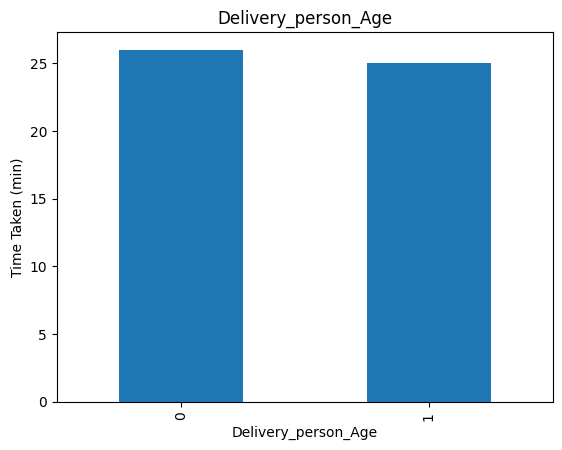

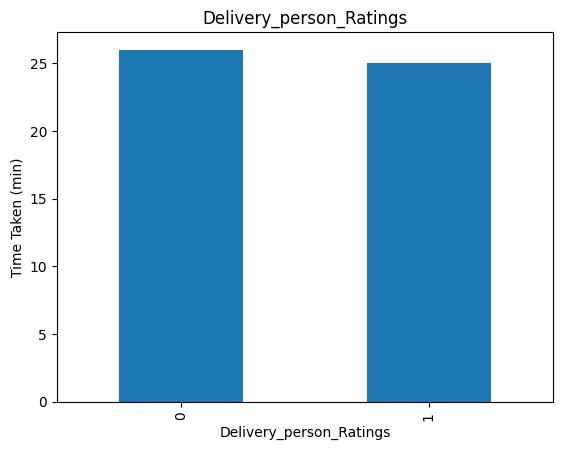

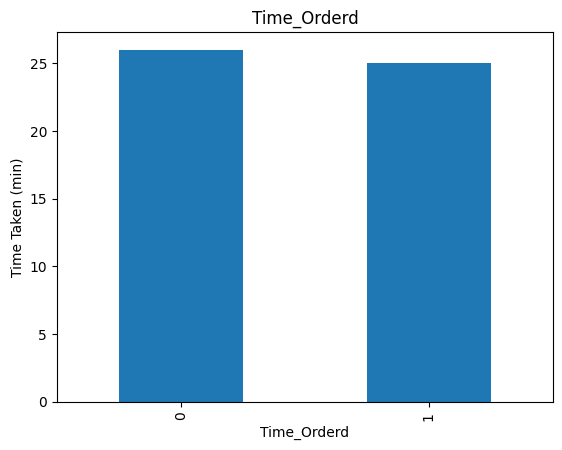

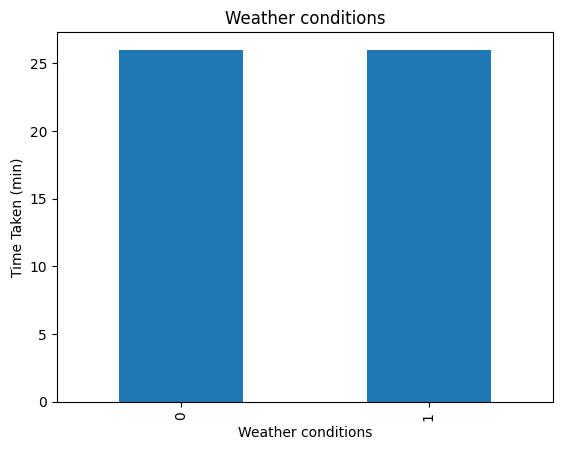

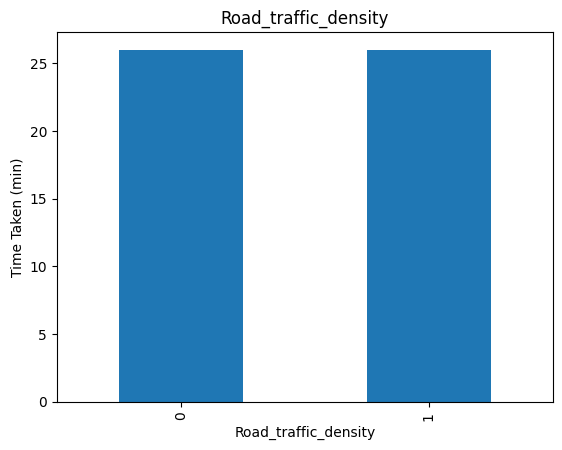

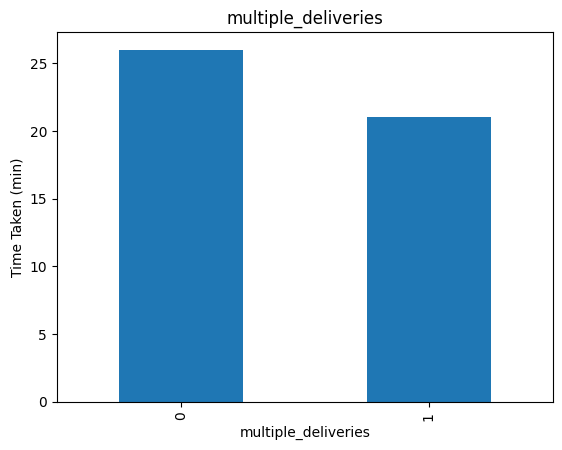

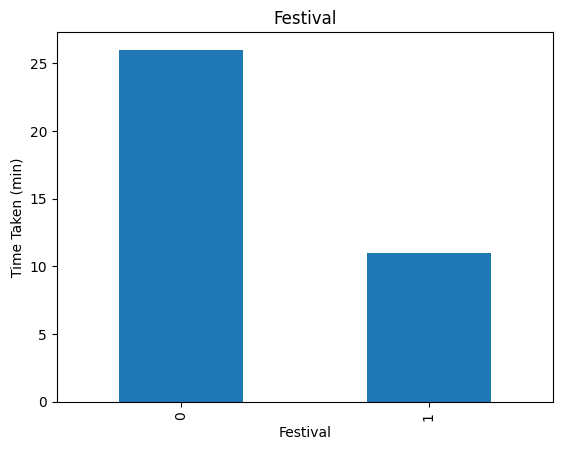

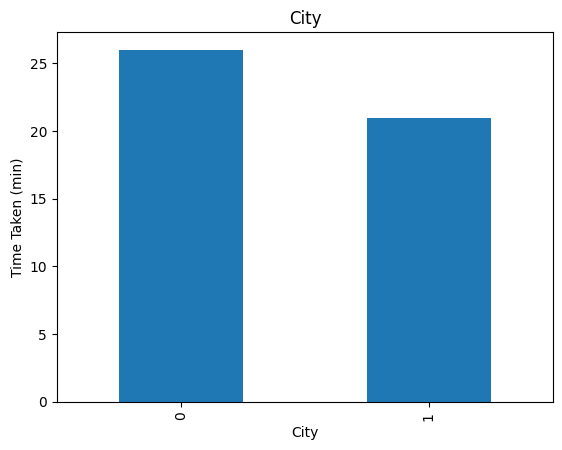

In [8]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean Time_taken (min) where the information is missing or present
    data.groupby(feature)['Time_taken (min)'].median().plot.bar()
    plt.ylabel("Time Taken (min)")
    plt.title(feature)
    plt.show()

## Observations

It is Clearly visible that we have strong relationships between our independent variables and dependent variable like have a look on the insights of festival,city and multiple delivers features so therefore we will use feature engineering to replace the Nan values with something meaningful.

In [9]:
print("Id Of Orders",":",len(df["ID"]))

Id Of Orders : 45584



From the dataset we don't require some of the features like ID as this one is just representing the unique order in the dataset.

Delivery_person_ID: This is the identifier of the delivery person and is not directly related to the delivery time.

## Checking the duplicates

In [10]:
df.duplicated().sum()

0

##### There are no duplicates values in the dataset

## Checking data types

In [11]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

## Checking the number of unique values of each column

In [12]:
df.nunique()

ID                             45584
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weather conditions                 6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
Time_taken (min)                  45
dtype: int64

## Check statistics of data set

In [13]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


## Insight

- 15 is the minimum age of the delivery persons
- 50 is the maximum age of the delivery persons



- 10 minutes in the minimum time taken by the person to deliver an order.
- 54 minutes is the maximum time taken by the person to deliver an order.






## Numerical Variables

In [14]:

# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  9


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,3.0,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1,1.0,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,1.0,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0,0.0,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1.0,41


In [15]:
numerical_features

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)']

## Temporal Variables(Eg: Datetime Variables)

In [16]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature or "yr" in feature or "year" in feature]

year_feature

[]

## Observation
### We don't have any temporal variables present inside the dataset over here

## As we know that numeric variables are of two types
- discrete feature
- continous feature

In [17]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['ID']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [18]:
discrete_feature

['Delivery_person_Age', 'Vehicle_condition', 'multiple_deliveries']

## lets find the relationship between the discrete variables and Time_Taken (min)

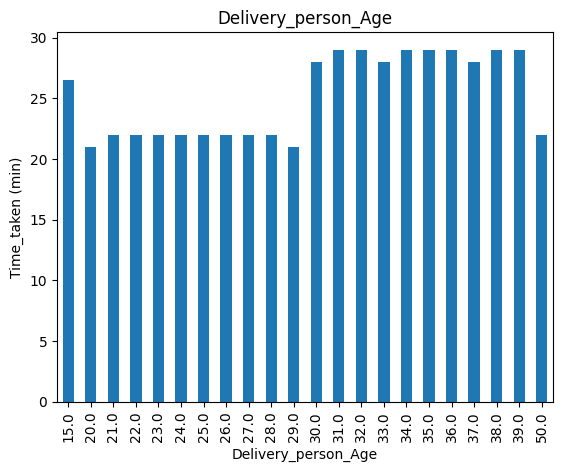

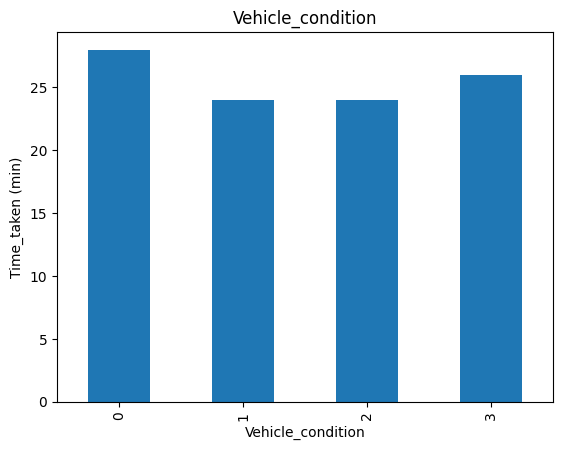

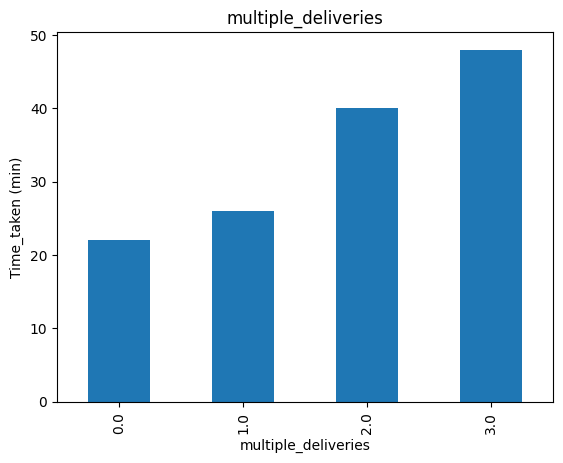

In [19]:

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['Time_taken (min)'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Time_taken (min)')
    plt.title(feature)
    plt.show()


## Insights

- over here person having age from 20 to 29 they are delivering the order very efficiently as compared to other ones.

- all the person having age of 15 years and all the person from age of 30 to 39 years are taking more time to deliver an order.

- in the case of vehicle condition 1 and 2 classes are taking less time to deliver an order.
- if person have multiple deliveries then more time will be taken to deliver an order.

## Continuous Variable

In [20]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['ID']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


In [21]:
continuous_feature

['Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Time_taken (min)']

## lets analyse the continuous values by creating the histograms to understand the distributions

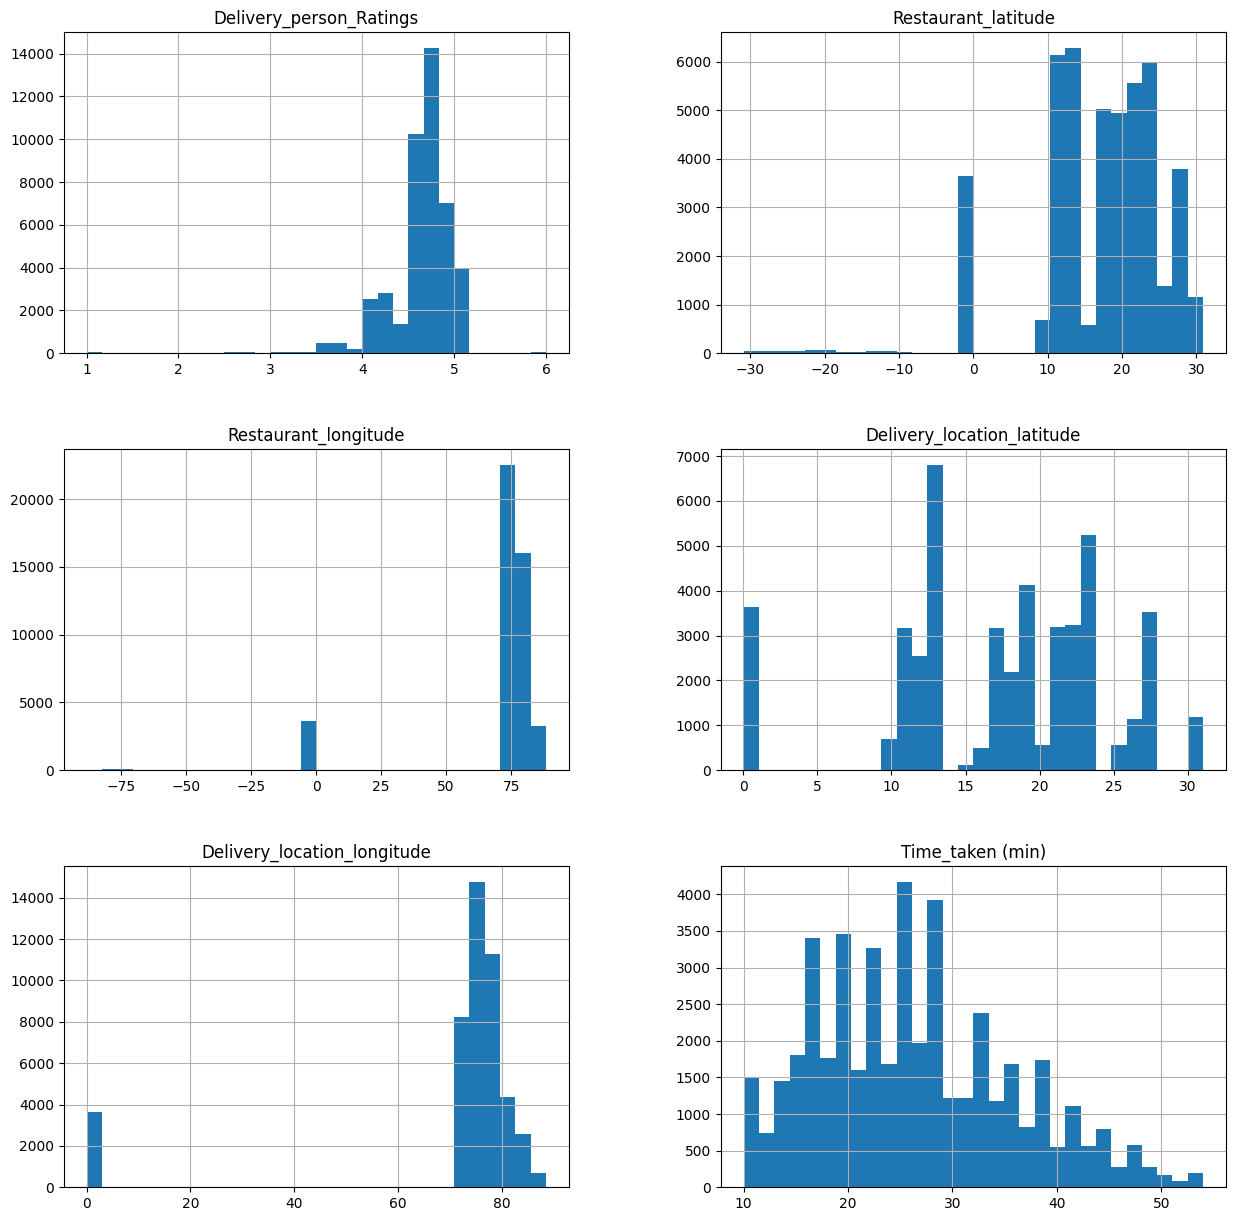

In [19]:
df[continuous_feature].hist(bins=30, figsize=(15,15))
plt.show()

## As most of above distributions are not normally distributed so therefore we are using yeo-johnson transformation to make the normal distribution

In [20]:
# for the yeo-johnson transformation
import scipy.stats as stats

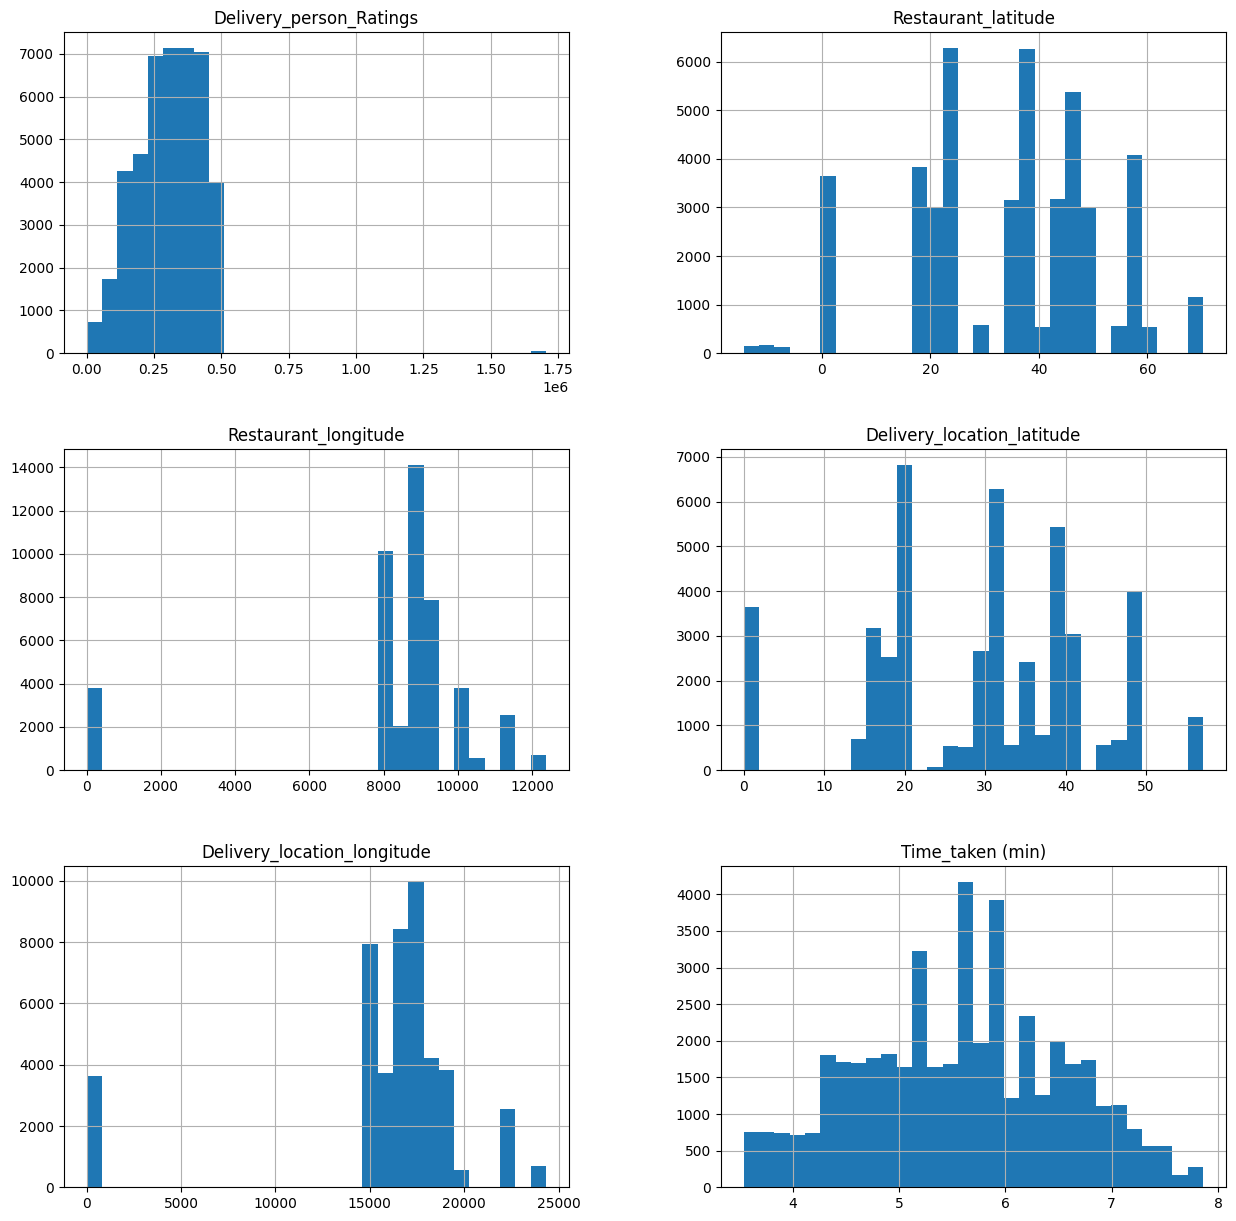

In [21]:
tmp = df.copy()

for var in continuous_feature:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
tmp[continuous_feature].hist(bins=30, figsize=(15,15))
plt.show()

- we can't completely bring the normal distribution but we can bring the distribution close to the normal distribution as yeo johnson distribution is giving more normal like distribution so therefore we are using this one over here

## Outliers

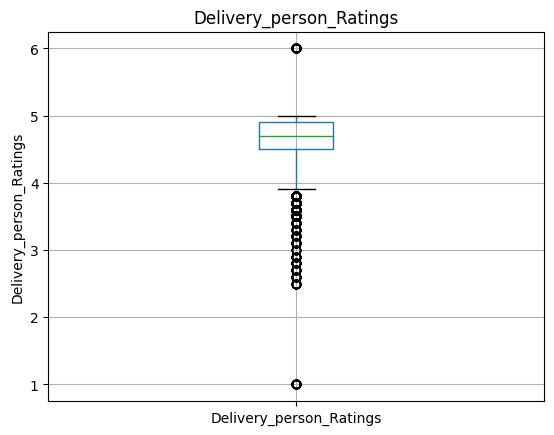

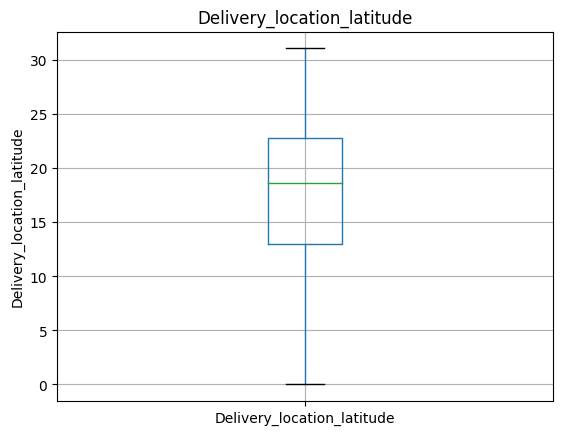

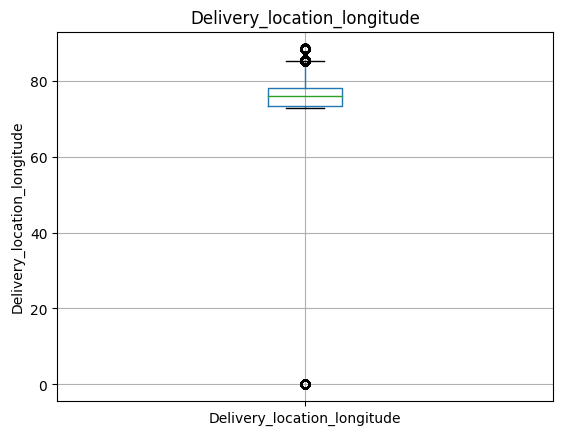

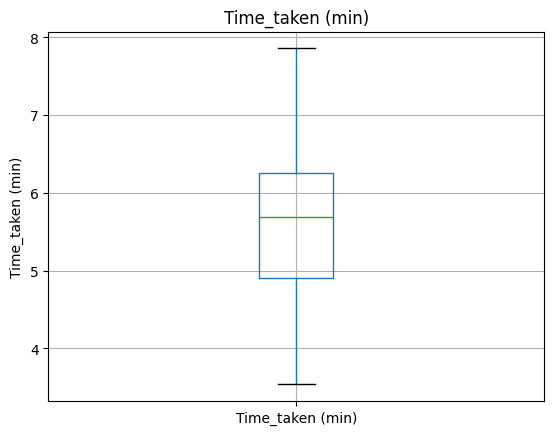

In [22]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[var], param = stats.yeojohnson(df[var])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Categorical Variables

In [23]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['ID',
 'Delivery_person_ID',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weather conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [24]:
df[categorical_features].head()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,0xcdcd,DEHRES17DEL01,12-02-2022,21:55,22:10,Fog,Jam,Snack,motorcycle,No,Metropolitian
1,0xd987,KOCRES16DEL01,13-02-2022,14:55,15:05,Stormy,High,Meal,motorcycle,No,Metropolitian
2,0x2784,PUNERES13DEL03,04-03-2022,17:30,17:40,Sandstorms,Medium,Drinks,scooter,No,Metropolitian
3,0xc8b6,LUDHRES15DEL02,13-02-2022,09:20,09:30,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian
4,0xdb64,KNPRES14DEL02,14-02-2022,19:50,20:05,Fog,Jam,Snack,scooter,No,Metropolitian


In [25]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is ID and number of categories are 45584
The feature is Delivery_person_ID and number of categories are 1320
The feature is Order_Date and number of categories are 44
The feature is Time_Orderd and number of categories are 177
The feature is Time_Order_picked and number of categories are 193
The feature is Weather conditions and number of categories are 7
The feature is Road_traffic_density and number of categories are 5
The feature is Type_of_order and number of categories are 4
The feature is Type_of_vehicle and number of categories are 4
The feature is Festival and number of categories are 3
The feature is City and number of categories are 4


### for dealing with Weather conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival ,City  we will use the ordinal encoder and for rest of the features we will use another technique accordingly

In [26]:
# make a list of the categorical variables that contain missing values

categorical_features_with_na = [
    var for var in categorical_features
    if df[var].isnull().sum() > 0
]

# print percentage of missing values per variable
df[categorical_features_with_na ].isnull().mean().sort_values(ascending=False)

Time_Orderd             0.037974
City                    0.026325
Weather conditions      0.013514
Road_traffic_density    0.013184
Festival                0.005002
dtype: float64

In [27]:
# variable to impute with the missing indicator
with_string_missing = [
    var for var in categorical_features_with_na if df[var].isnull().mean() > 0.1]

# variables to impute with the most frequent category
with_frequent_category = [
    var for var in categorical_features_with_na if df[var].isnull().mean() < 0.1]

In [28]:
with_string_missing

[]

In [29]:
with_frequent_category

['Time_Orderd',
 'Weather conditions',
 'Road_traffic_density',
 'Festival',
 'City']

## Observation
- So we will replace the categorical missing values with the mode as they are the features with frequent cateogories

##  Exploring Data ( Visualization )

### Visualize distribution to make some conclusion.


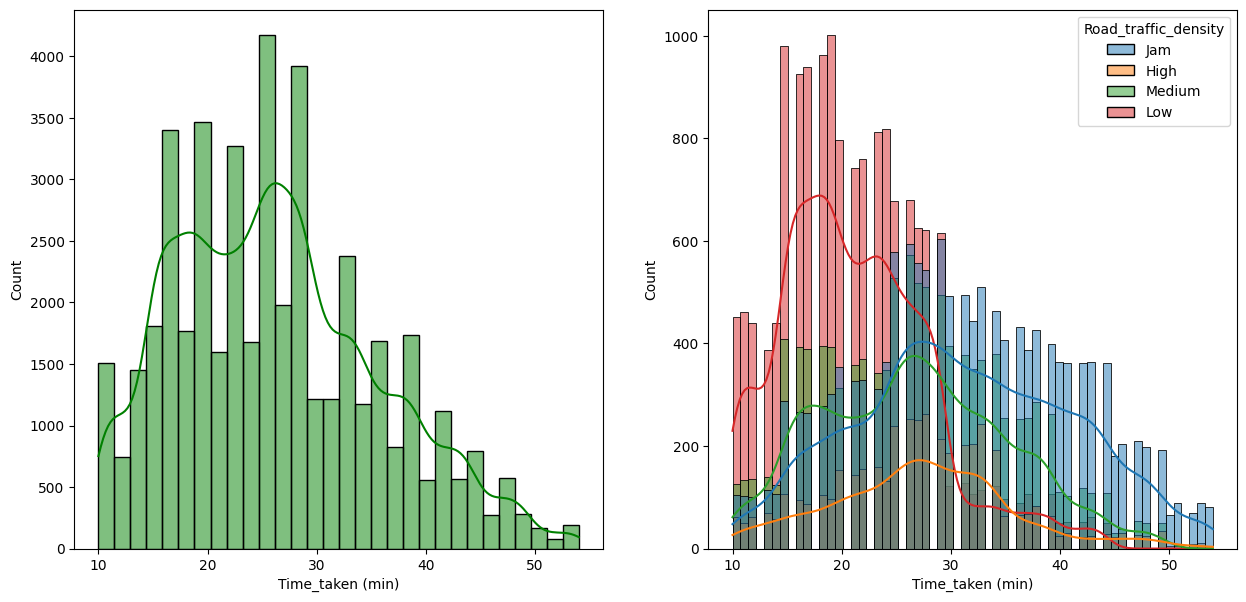

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Time_taken (min)',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Time_taken (min)',kde=True,hue='Road_traffic_density')
plt.show()


###### Insights
- in high road traffic density the time taken to deliver an order is more as compared to low road traffic density.It may be necessary to adjust delivery routes or schedules to account for weather-related delays.



# For which Type of order out of snacks, Meal , Drinks and Buffet we have more number of orders?


<div class='tableauPlaceholder' id='viz1678613027181' style='position: relative'><noscript><a href='#'><img alt='For which Type of order out of snacks, Meal ,Drinks and Buffet we have more number of orders? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fi&#47;first_16786129755690&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='first_16786129755690&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fi&#47;first_16786129755690&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678613027181');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Insights
- although we have almost equal sales for each and every type of order but snacks tends to be more as compared to other type of orders.

## From which city we are getting more number of orders?

<div class='tableauPlaceholder' id='viz1678613570916' style='position: relative'><noscript><a href='#'><img alt='For which Type of order out of snacks, Meal ,Drinks and Buffet we have more number of orders? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;se&#47;second_16786135560890&#47;Sheet12&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='second_16786135560890&#47;Sheet12' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;se&#47;second_16786135560890&#47;Sheet12&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678613570916');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Insights
- from Metropolitian city we are getting more number of orders it means we can also open new restaurants in Metropolitian cities to reduce the time taken by delivery persons to deliver an order.

## How many delivery persons are there having 5 out of 5 Rating?

<div class='tableauPlaceholder' id='viz1678614456211' style='position: relative'><noscript><a href='#'><img alt='How many delivery persons are there having 5 out of 5 Rating? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;th&#47;third_16786144284970&#47;Sheet13&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='third_16786144284970&#47;Sheet13' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;th&#47;third_16786144284970&#47;Sheet13&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678614456211');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Insights
- Clearly we have 1130 delivery person having 5 out of 5 rating.
- over here we have rating of 6 as well so as we know that rating cannot exceed 5 so therefore we will treat it as a outlier. and we will remove it because it may be there due to typos we will use 5 number summary to deal with this outlier.

## Minimum Time Taken to deliver an order when there is festival or when there is not a festival?

<div class='tableauPlaceholder' id='viz1678637887340' style='position: relative'><noscript><a href='#'><img alt='Max Time taken to deliver an order in the case of differernt means of transport ? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fo&#47;fourth_16786169903030&#47;Sheet15&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='fourth_16786169903030&#47;Sheet15' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fo&#47;fourth_16786169903030&#47;Sheet15&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678637887340');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Insights
- Clearly whenever there is a festival season then the time taken to deliver an order is more as compared to the days when there is not festival season.

## Max Time taken to deliver an order in the case of differernt means of transport ?

<div class='tableauPlaceholder' id='viz1678616999686' style='position: relative'><noscript><a href='#'><img alt='Max Time taken to deliver an order in the case of differernt means of transport ? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fo&#47;fourth_16786169903030&#47;Sheet15&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='fourth_16786169903030&#47;Sheet15' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fo&#47;fourth_16786169903030&#47;Sheet15&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678616999686');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


## Insights
- Clearly maximum time taken by scooter, motorcycle and electric_scooter is almost same there are taking maximum time of around 54 minutes and bicycle is taking lesser time it takes maximum 47 minutes to deliver an order this is because we can probably travel by bicycle very swiftly in the case of high road density and we will not even have to find the uTurn in the case of bicycle so that may be the reason because of which bicycle is taking lesser time as compared to other means of transport.

## Min Time taken to deliver an order in the case of differernt means of transport ?

<div class='tableauPlaceholder' id='viz1678617100997' style='position: relative'><noscript><a href='#'><img alt='Max Time taken to deliver an order in the case of differernt means of transport ? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;si&#47;sixth_16786170895000&#47;Sheet16&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='sixth_16786170895000&#47;Sheet16' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;si&#47;sixth_16786170895000&#47;Sheet16&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678617100997');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##  Insights
- All the means of transport are taking at least 10 minutes to deliver an order.

## How the time taken to deliver an order is affected by the weather conditions?

<div class='tableauPlaceholder' id='viz1678618416203' style='position: relative'><noscript><a href='#'><img alt='Max Time taken to deliver an order in the case of differernt means of transport ? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;se&#47;seventh_16786184059830&#47;Sheet17&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='seventh_16786184059830&#47;Sheet17' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;se&#47;seventh_16786184059830&#47;Sheet17&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678618416203');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##  Insights
- In Sunny weather time taken will lesser and in the case of foggy weather the time taken will be more.

## which WeekDay has more number of orders ?

<div class='tableauPlaceholder' id='viz1678623202295' style='position: relative'><noscript><a href='#'><img alt='Max Time taken to deliver an order in the case of differernt means of transport ? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nineth&#47;Sheet19&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nineth&#47;Sheet19' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nineth&#47;Sheet19&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678623202295');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##  Insights
- On Wednesday we have more number of order and on monday we have lesser number of orders

## How many months of dataset we have ?

<div class='tableauPlaceholder' id='viz1678623521326' style='position: relative'><noscript><a href='#'><img alt='Max Time taken to deliver an order in the case of differernt means of transport ? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;te&#47;ten_16786234766370&#47;Sheet110&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ten_16786234766370&#47;Sheet110' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;te&#47;ten_16786234766370&#47;Sheet110&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678623521326');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Insights
- Clearly we have three months of dataset in our hand